## MNIST CNN With Keras
#### Samuel Madden

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

np.random.seed(2)

# Keras imports
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

# Ouptut System Versions
print("Python Version: " + sys.version)
print("Pandas Version: " + pd.__version__)

Using TensorFlow backend.


Python Version: 3.6.5 (default, Mar 30 2018, 06:41:53) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
Pandas Version: 0.22.0


## 1. Introduction

..

## 2. Data Preparation

#### 2.1 Import

In [3]:
mnist_train = pd.read_csv('mnist/mnist_train.csv')

mnist_test = pd.read_csv('mnist/mnist_test.csv')

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


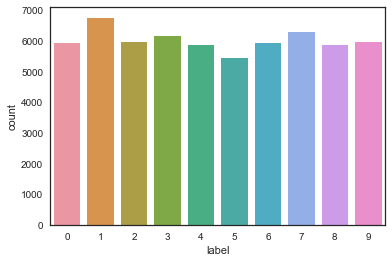

In [4]:

X_train, Y_train = mnist_train.iloc[:,1:], mnist_train['label']

X_test, Y_test = mnist_test.iloc[:, 1:], mnist_test['label']

g = sns.countplot(Y_train)

Y_train.value_counts()

All labels (0-9) are accounted for in the above value count with 
no unexpected Null or -1 instances.

The labels between 0 - 9 are also relatively evenly distributed

In [5]:
# note dimension of data images
img_rows, img_cols = 28, 28

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


#### 2.2 Scan for Null/Missing Values

In [6]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
X_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

#### 2.3 Normalization

Perform a grayscale normalization

Convert the pixel lumination from a value between 0 - 255 to a scale of 0 - 1

In [8]:
X_train = X_train / 255.0

X_test = X_test / 255.0

### 2.4 Reshape

The data images are 28px X 28px. These images are reshaped to 2D representation of 1 x 784
in the MNIST dataset.

In [9]:
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Reshape image in 3 dimensions (height = 28, width = 28, chanal = 1)

# check image shape
#X_train[0].shape

X_train = X_train.values.reshape(-1, img_rows, img_cols, 1)

X_test = X_test.values.reshape(-1, img_rows, img_cols, 1)

</br>
Keras requires a 3 dimensional input to correspond to height, width and channel.</br>
In the case of MNIST, the images are grayscale and require one channel.

In [11]:
# X_train
print("X_train info: ")
print("Type: ", type(X_train))
print("Dimensions: ", X_train.ndim)
print("Type var stored: ", X_train.dtype)
print("\n")

# X_test
print("X_test info: ")
print("Type: ", type(X_test))
print("Dimensions: ", X_test.ndim)
print("Type var stored: ", X_test.dtype)

X_train info: 
Type:  <class 'numpy.ndarray'>
Dimensions:  4
Type var stored:  float64


X_test info: 
Type:  <class 'numpy.ndarray'>
Dimensions:  4
Type var stored:  float64


#### 2.5 Label Encoding

Labels are 10 single digits 0 - 9. </br>
&#09;&bull; Convert each digit to a corresponding hot vector ex. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]. This allows for identification due to the corresponding activation of one of the 10 output neurons.</br>
&bull; Again this transforms the data from type pandas.DataFrame to a np.ndarray.

In [12]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [13]:
# Y_train
print("Y_train info: ")
print("Type: ", type(Y_train))
print("Dimensions: ", Y_train.ndim)
print("Type var stored: ", Y_train.dtype)

Y_train info: 
Type:  <class 'numpy.ndarray'>
Dimensions:  2
Type var stored:  float32


#### 2.6 Splitting Training and Validation Set

In [14]:
# set random seed
random_seed = 2

In [15]:
# Split the train and validation sets for fitting the model

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

&bull; 10% is partitioned to the evaluation set while the remaining 90% is used to train the model. </br>
&bull; A random split of the training data is admissable as we have already established that the distribution of labels is consistent across the data set (see 2.1). This ensures no overrepresentation of certain labels in the X_train/Y_train and X_val/Y_val.</br></br>
&bull; This is not always the case and for unbalanced datasets use stratify = True option in train_test_split function (Only for >=0.17 sklearn versions).

</br>
Print a sample element of the X_train dataset

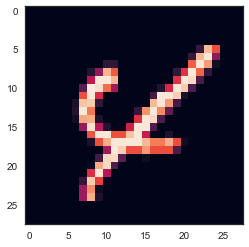

In [16]:
g = plt.imshow(X_train[0][:,:,0])

## 3. CNN

### 3.1 Defining the Model

The Keras data model type will be set to 'Sequential', in which the model is built one layer at a time.</br>
&nbsp; &bull; add() function will add layers to the model individually</br>
&nbsp; &bull; The inputs of 32 & 64 refer to the number of nodes in specific layer</br>

Conv2D layers are convolutional layers that deal with the 2 dimensional matrix input (a.k.a. input images). </br>
This is a learnable filter that is a transformation on the image defined by the kernel size</br>
&nbsp; &bull; Kernel size refers to the size of the filter matrix for the convolutional layer. Size=3 means a 3x3 conv matrix</br>
&nbsp; &bull; Activation function is set to ReLU define by y=max(0,x), which lends to model sparsity and faster convergence.</br>
&nbsp; &bull; MaxPool2D picks the max value of the neighboring pool

The Flatten layer converts the final feature maps into a single 1D vector. </br>
Dense refers to the fact that each neuron of a layer are connected to all the neurons of the layer previous.</br>
Dropout randomly selects nodes to be ignored(set w=0), promoting distributed learning, generalization and reducing overfitting.

The output layer consists of 10 nodes, representing the classification options of 0-9</br>
&nbsp; &bull; 'softmax' has the output layer sum to 1 allowing the output nodes to be interpreted as probabilities of their corresponding number.

In [17]:
# Create the CNN model

# Architexture: Input -> [[Conv2D->ReLU]*2 -> MaxPool2D -> Dropout] * 2 -> 
#  Flatten -> Dense -> Dropout -> Output

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

#### 3.2 Compiling the Model

Create and settup a Score Function, Loss Function and Optimisation algorithm</br>
